<a href="https://colab.research.google.com/github/manu9418/IRH/blob/main/TIME_SERIES_IRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGANDO LIBS Y DATA

In [ ]:
#!pip install metpy
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
dateERA5 = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
dateGPM  = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d')

data_tmax = pd.read_csv('/content/drive/MyDrive/Data/ERA5_tmax_est_data.csv',parse_dates=['time'], date_parser=dateERA5, index_col=['time'])
data_tmin = pd.read_csv('/content/drive/MyDrive/Data/ERA5_tmin_est_data.csv',parse_dates=['time'], date_parser=dateERA5, index_col=['time'])
data_pp   = pd.read_csv('/content/drive/MyDrive/Data/GPM_ppCal_est_data.csv',parse_dates=['time'], date_parser=dateGPM, index_col=['time']) 

# data_pp.dtypes
# data['Date']= pd.to_datetime(data.Date)
# data=data.set_index('Date')

## data diaria (tmax, tmin)

In [ ]:
df_dates = pd.DataFrame(index = data_tmax.index)
data_temp= data_tmax[['1']].reindex(df_dates.index)
data_temp.columns = [['tmax']]
data_temp['tmin']= data_tmin['1'].reindex(df_dates.index)
data_temp

# dft[estacion[1]]= df2.reindex(df_dates.index)
# dft[estacion[2]]= df3.reindex(df_dates.index)

,tmax,tmin
time,,
2005-01-01 00:00:00,278.31470,277.31223
2005-01-01 06:00:00,275.85178,275.60144
2005-01-01 12:00:00,275.22452,274.78284
2005-01-01 18:00:00,283.99594,282.73334
2005-01-02 00:00:00,278.85876,277.98703
...,...,...
2021-06-29 18:00:00,280.60022,279.78476
2021-06-30 00:00:00,276.42813,276.15690
2021-06-30 06:00:00,274.65836,274.42044


## data mensual (tmax, tmin, pp)

In [ ]:
tmax = data_temp[['tmax']].resample('MS').max()
tmin = data_temp[['tmin']].resample('MS').min()
pp   = data_pp.resample('MS').sum()

df_dates = pd.DataFrame(index = tmax.index)
df_dates.set_index

df= tmax.reindex(df_dates.index)
#data_temp.columns = [['tmax']]
df['tmin']= tmin.reindex(df_dates.index)
df['pp']= pp[['1']]['2005':'2021'].reindex(df_dates.index)
df

,tmax,tmin,pp
time,,,
2005-01-01,286.24750,267.01688,113.538389
2005-02-01,286.12274,270.97968,128.300214
2005-03-01,284.87160,272.55120,198.586578
2005-04-01,285.06720,268.27478,72.164916
2005-05-01,285.86868,269.29605,28.097396
...,...,...,...
2021-02-01,285.87033,268.65520,15.052322
2021-03-01,284.51535,270.35202,34.768540
2021-04-01,284.56604,270.13992,42.802231


In [ ]:
# from metpy.calc import saturation_vapor_pressure
# from metpy.units import pandas_dataframe_to_unit_arrays
# print((1 * units.kelvin).to(units.degC))
# 'dewpoint': dewpoint_from_relative_humidity((np.array(temp) * units.degC).to(units.K),
#                                                     np.array(rh) / 100.).to(units('degF')),
# my_units = {'tmax':'kelvin', 'tmin':'kelvin','pp':'mm'}
# df_units= pandas_dataframe_to_unit_arrays(df, column_units=my_units)
# df_units['tmax',].to(units.degC)

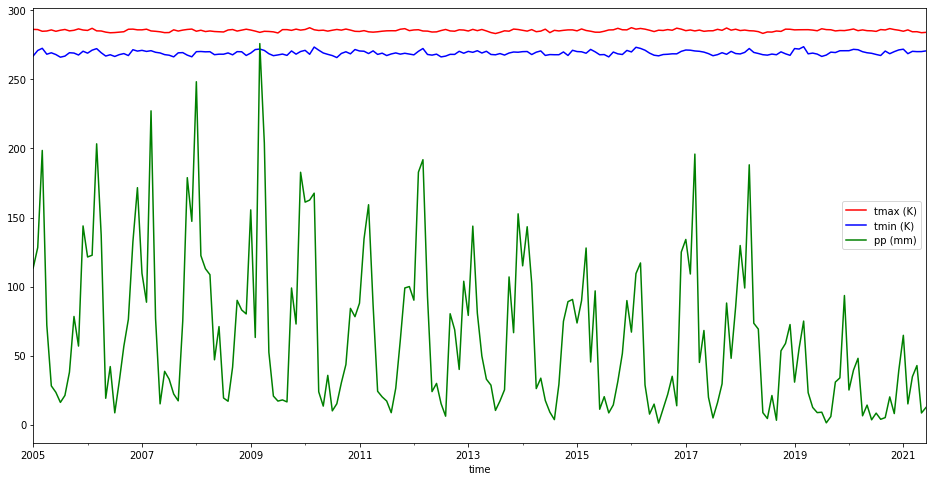

In [ ]:
df.plot(figsize=(16,8), color=['red','blue', 'green', 'lightblue'])
plt.legend(['tmax (K)','tmin (K)','pp (mm)'])

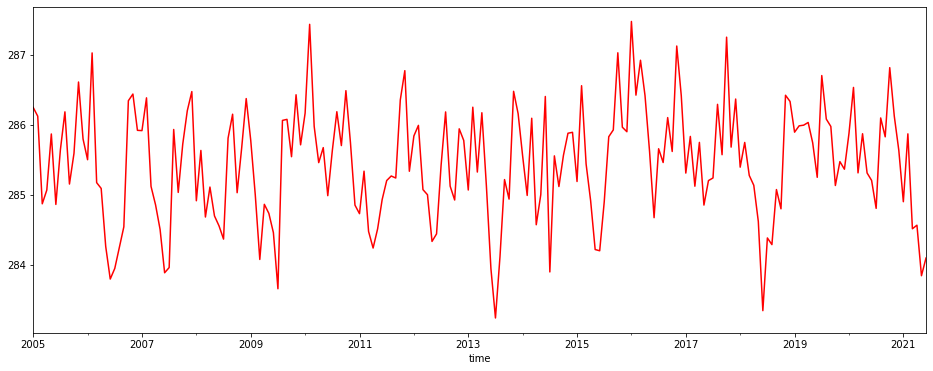

In [ ]:
df[['tmax']].plot(c='red',legend=False, figsize=(16,6))

## data keeling curve
- https://keelingcurve.ucsd.edu/permissions-and-data-sources/

In [ ]:
#@title import keeling curve
import pandas as pd
import io
import requests

url="https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
kc = pd.read_csv(url, skiprows=57, header=None, names=['Anio', 'Mes', 'Date Excel', 'CO2 [ppm]', 'CO2 [ppm] 2', 'CO2 [ppm] 3', 'CO2 [ppm] 4', 'CO2 [ppm] 5', 'CO2 [ppm] 6'])
CO2 = kc['CO2 [ppm]']

# Yr	Mn	Date	Date	  CO2	    seasonally	fit	    seasonally	    CO2	          seasonally
#                               adjusted		      adjusted fit	    filled	      adjusted filled
#               Excel		[ppm]	    [ppm]	   [ppm]      [ppm]	        [ppm]	        [ppm]

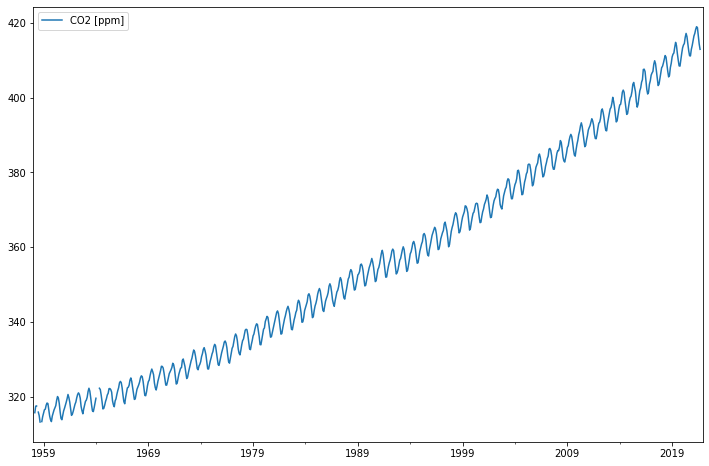

In [ ]:
df_index= pd.date_range(start='1958-01-01',end='2021-12-01',freq='MS')
df_CO2 = pd.DataFrame(data= CO2.values, index=df_index,columns=['CO2 [ppm]']) #.dtype
# df_CO2 = df_CO2.replace(-99.99, None)
df_CO2[df_CO2 < 0] = None;
df_CO2.plot(figsize=(12,8))

In [ ]:
df_CO2=df_CO2['1970':'2020']
df_CO2

,CO2 [ppm]
1970-01-01,325.06
1970-02-01,325.98
1970-03-01,326.93
1970-04-01,328.13
1970-05-01,328.08
...,...
2020-08-01,412.52
2020-09-01,411.18
2020-10-01,411.12
2020-11-01,412.88


In [ ]:
df_CO2.isnull().sum() # de 10 a 3

CO2 [ppm]    0
dtype: int64

In [ ]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2, weights="uniform")
# df_CO2['CO2 [ppm]'] = imputer.fit_transform(df_CO2)
# df_CO2

# AUTOCORRELACION y AUTOCORRELACION PARCIAL  

[FUENTE]()

In [ ]:
# import matplotlib.pyplot as plt
import statsmodels.api as sm
def corr_plotter(ts, lags):
    """
    Plots the ACF and PACF for the given dataframe, states, and lags
    """
    fig, (axs1, axs2) = plt.subplots(2, 1, figsize=(12,5), sharex=True)
    
    sm.graphics.tsa.plot_acf(ts, lags=lags, ax=axs1);
    sm.graphics.tsa.plot_pacf(ts, lags=lags, ax=axs2);
    
    plt.tight_layout()

## aplicacion a la data



Text(0.5, 1.06, 'Correlation Functions for Undifferenced Temperature')

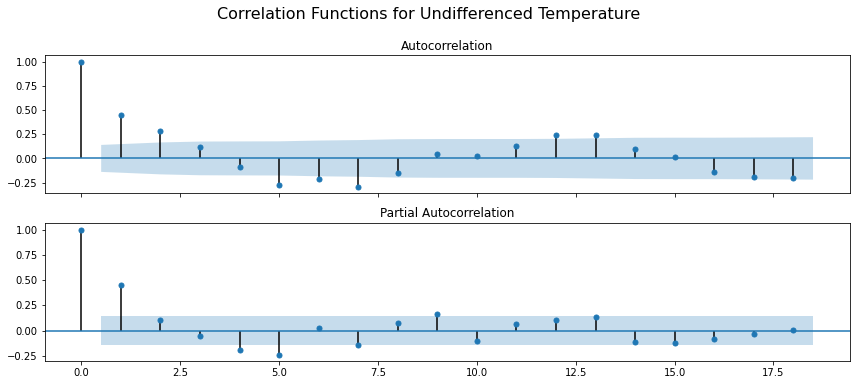

In [ ]:
corr_plotter(df[['tmax']], lags=18)
plt.suptitle('Correlation Functions for Undifferenced Temperature', fontsize=16, y = 1.06)

Text(0.5, 1.06, 'Correlation Functions for Undifferenced Temperature')

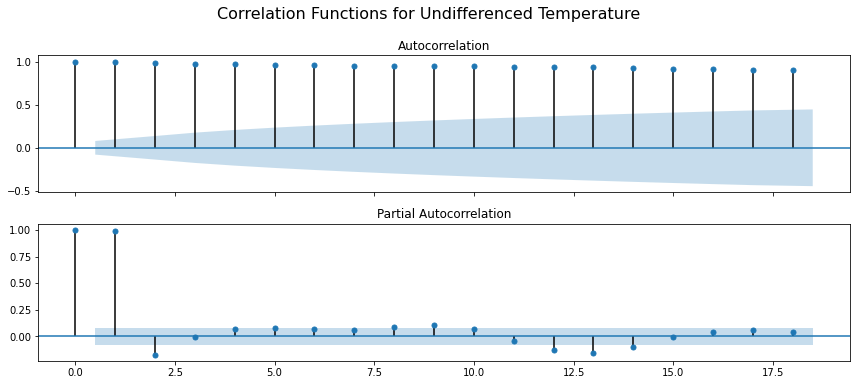

In [ ]:
corr_plotter(df_CO2, lags=18)
plt.suptitle('Correlation Functions for Undifferenced Temperature', fontsize=16, y = 1.06)

## detrend

In [ ]:
def cubic_detrend(data, orden):
    coef                        = np.polyfit(range(len(data)), data, orden)
    poly                        = np.polyval(coef, range(len(data)))
    poly                        = np.reshape(poly, (len(poly),1))
    data_detrended              = data - poly

    
    fig, (axs1, axs2) = plt.subplots(2, 1, figsize=(12,5), sharex=True)
    axs1.plot(data)
    axs1.plot(poly)
    axs2.plot(data_detrended)

    return data_detrended

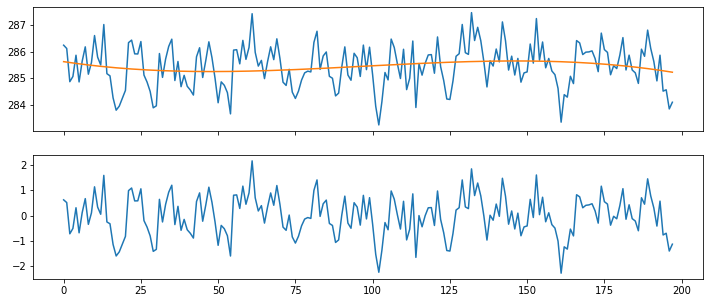

In [ ]:
df_detrended = cubic_detrend(df[['tmax']].values, 3)

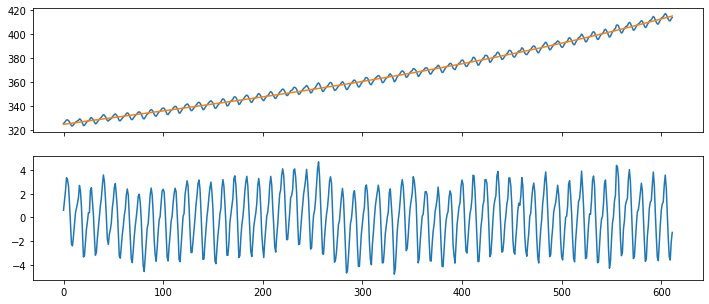

In [ ]:
df_CO2_detrended = cubic_detrend(df_CO2.values, 3)

## aplicacion a la detrended data

Text(0.5, 1.06, 'Correlation Functions for Undifferenced Temperature')

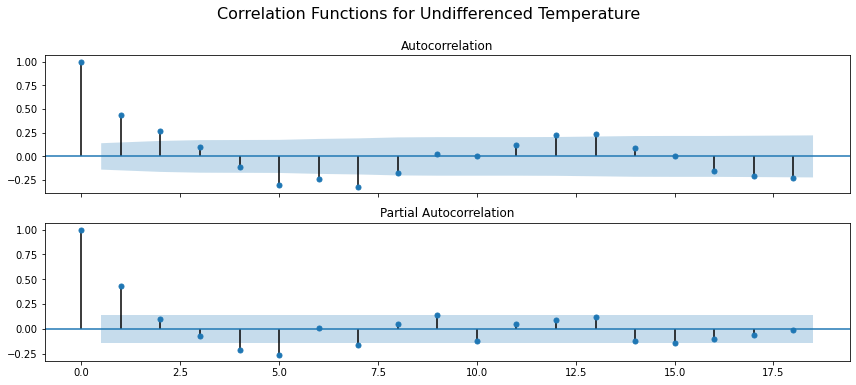

In [ ]:
corr_plotter(df_detrended, lags=18)
plt.suptitle('Correlation Functions for Undifferenced Temperature', fontsize=16, y = 1.06)

Text(0.5, 1.06, 'Correlation Functions for Undifferenced Temperature')

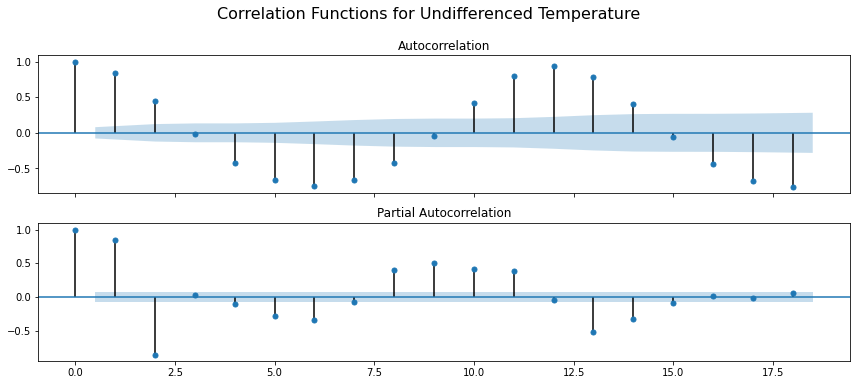

In [ ]:
corr_plotter(df_CO2_detrended, lags=18)
plt.suptitle('Correlation Functions for Undifferenced Temperature', fontsize=16, y = 1.06)

# ANALISIS ESPECTRAL  
Lo importante de fft es que solo se puede aplicar a datos en los que la marca de tiempo es uniforme, es decir, muestreo uniforme en el tiempo.

fftfreq proporciona los componentes de frecuencia correspondientes a sus datos. 

- [REF 1](https://colab.research.google.com/drive/10VADEg8F5t_FuryEf_ObFfeIFwX-CxII#scrollTo=-0wekbUzqz0H)
- [REF 2](https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python)

Otras referencias a PSD
- https://notebook.community/pxcandeias/py-notebooks/DSP_FFT_psd
- https://notebook.community/JoseGuzman/myIPythonNotebooks/SignalProcessing/Welch's%20periodogram
- https://notebook.community/arokem/brain-hacking-101/beginner-python/003-calculations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
import matplotlib.transforms as mtransforms
# from numpy.random import random
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from numpy.fft import rfft, irfft, rfftfreq
from scipy import pi, signal, fftpack

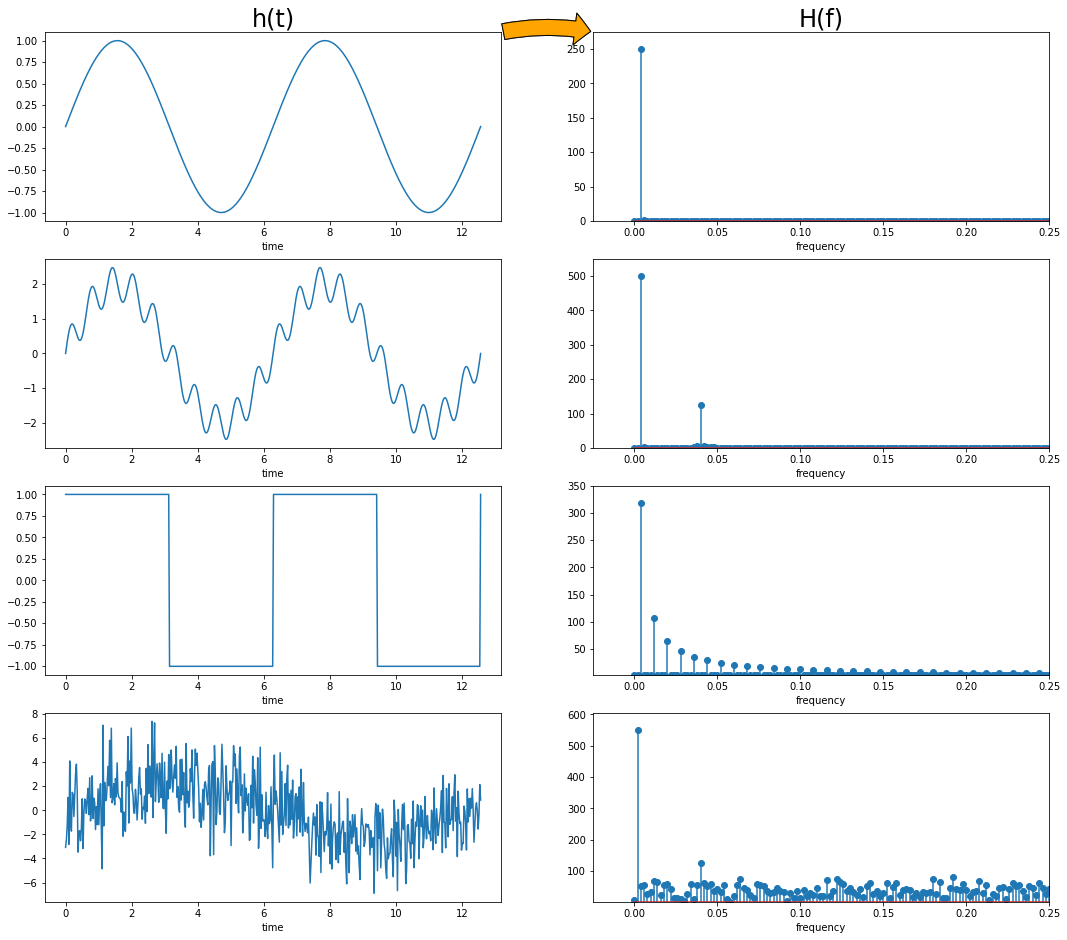

In [ ]:
#@title code example
fig = plt.figure(figsize=(18, 16))
columns = 2
rows = 4

xs = np.linspace(0, 4*np.pi, 500)

f1 = np.sin(xs)
f2 = 2*np.sin(xs) + 0.5*np.sin(10*xs)
# 2*xs acortando el periodo aumentando la frec
# xs/2 aumento el periodo acorto la frec
f3 = signal.square(xs)
f4 = 2*np.sin(xs/2) + 0.5*np.sin(10*xs) + np.random.normal(0, 2, xs.shape)

functions = [f1, f2, f3, f4]
fft_functions = []
freq_functions = []

for i in range(len(functions)):
  fft_functions.append(np.abs(rfft(functions[i])))
  freq_functions.append(rfftfreq(len(functions[i])))

ax = []

for i in range(columns*rows):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    # ax[-1].get_xaxis().set_visible(False)
    # ax[-1].get_yaxis().set_visible(False)

    if(i == 0):
      ax[-1].set_title("h(t)", fontsize=24)
    if(i == 1):
      ax[-1].set_title("H(f)", fontsize=24)


    if ((not i % 2) and i//2 < len(functions)):
      plt.plot(xs, functions[i//2])
      ax[-1].set_xlabel("time")

    else:
      plt.stem(np.abs(freq_functions[i//2]), np.abs(fft_functions[i//2]))
      ax[-1].set_xlabel("frequency")
      ax[-1].set_xlim(min(np.abs(freq_functions[i//2]))-0.025, max(np.abs(freq_functions[i//2]))/2.0)
      ax[-1].set_ylim(min(np.abs(fft_functions[i//2])), max(np.abs(fft_functions[i//2]))*1.1)

plt.arrow(x=0, y=-1, dx=35, dy=1, width=.06)

ax0tr = ax[0].transData
ax1tr = ax[1].transData
figtr = fig.transFigure.inverted()

ptB = figtr.transform(ax0tr.transform((1, 1)))
ptE = figtr.transform(ax1tr.transform((-0.025, 275)))

arrow = matplotlib.patches.FancyArrowPatch(
    ptB, ptE, transform=fig.transFigure,
    fc = "orange", connectionstyle="arc3,rad=-0.1", arrowstyle=matplotlib.patches.ArrowStyle.Simple(head_length=.4, head_width=.8, tail_width=.4), alpha = 0.9,
    mutation_scale = 40.
)

fig.patches.append(arrow)
fig.patches.append(arrow)
plt.show()

# Detectar estacionalidad en la serie de tiempo usando Fast Fourier Transform

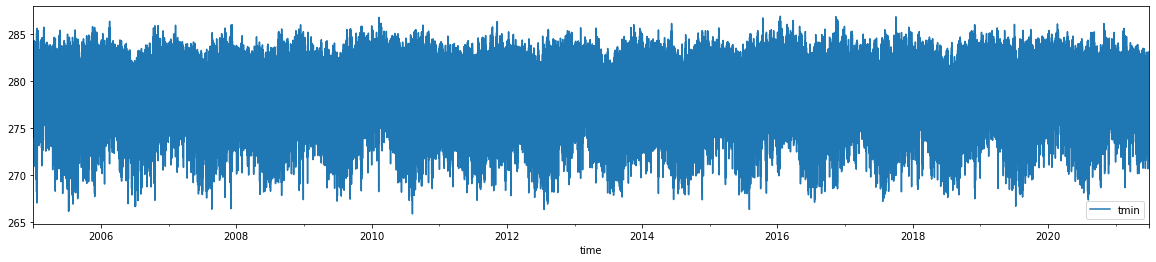

In [ ]:
data_temp[['tmin']].plot(figsize=(20,4))
plt.legend(['tmin'])

In [ ]:
data = data_temp[['tmin']].resample('D').min()
data.columns=['temperature']
data.drop(data.index[0],axis=0,inplace=True)
data

,temperature
time,
2005-01-02,274.02990
2005-01-03,276.14150
2005-01-04,274.08423
2005-01-05,274.30050
2005-01-06,274.73980
...,...
2021-06-26,270.96620
2021-06-27,271.45798
2021-06-28,273.43918


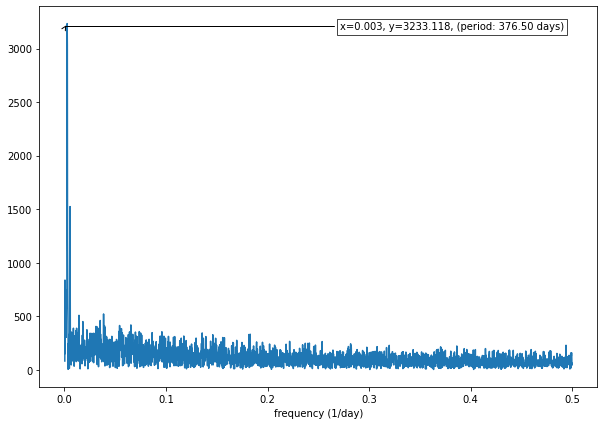

In [ ]:
def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax) 
    #text = f"{xmax=}, {ymax=}, (period: {1./xmax} days)" #Eh, Colab has Python 3.6 ... 
    text = f"x={xmax:.3f}, y={ymax:.3f}, (period: {(1./xmax):.2f} days)"
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax),  xytext=(0.94, 0.96), **kw)


nobs = len(data['temperature'])
temperature_ft = np.abs(rfft(data['temperature']))
temperature_freq = rfftfreq(nobs)

plt.figure(figsize=(10, 7))
plt.plot(temperature_freq[2:], temperature_ft[2: ])
annot_max(temperature_freq[2:], temperature_ft[2: ])
    
plt.xlabel('frequency (1/day)')
plt.show()

In [ ]:
tmp = pd.DataFrame({'frequency [1/day]':temperature_freq[2: ], 'y':temperature_ft[2: ]})
tmp['period [days]'] = (1/tmp['frequency [1/day]'])

tmp.sort_values(by=['y'], ascending=False)#.to_csv('seasonality.csv', index=False)

,frequency [1/day],y,period [days]
14,0.002656,3233.118100,376.500000
15,0.002822,3028.028400,354.352941
31,0.005478,1523.511375,182.545455
16,0.002988,1200.936563,334.666667
13,0.002490,1094.311117,401.600000
...,...,...,...
2589,0.430113,3.288678,2.324971
20,0.003652,2.795139,273.818182
2426,0.403054,2.073072,2.481054
2188,0.363546,1.692610,2.750685


# Suavizar la serie de tiempo usando Inverse Fast Fourier Transform

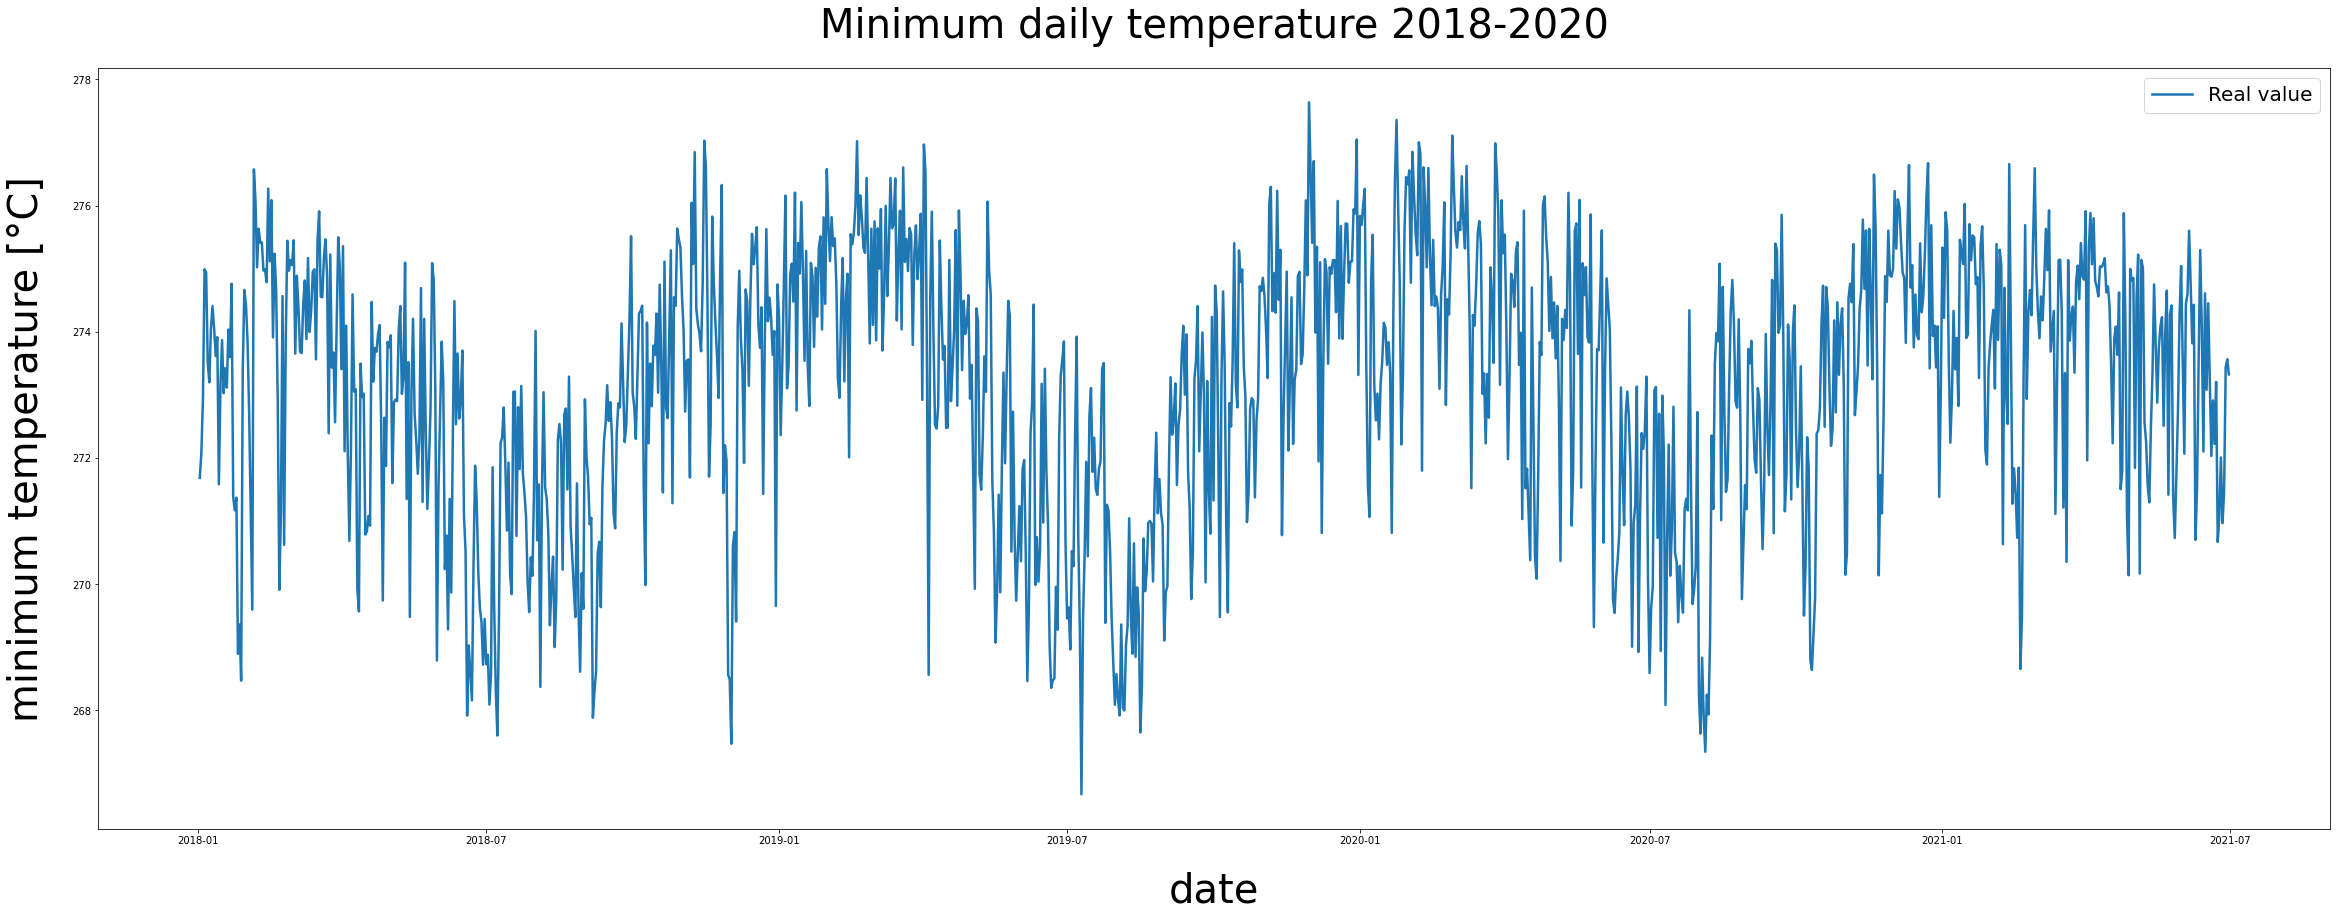

In [ ]:
fig = plt.figure(figsize=(40,14))
plt.xlabel('date',fontsize=40, labelpad=25)
plt.ylabel('minimum temperature [°C]',fontsize=40, labelpad=25)
plt.plot(data.loc[data.index > '2018']['temperature'], linewidth=2.5)
plt.legend(['Real value'], prop={'size': 20})
plt.title('Minimum daily temperature 2018-2020',fontsize=40, pad=30)
                                                 
plt.show()

In [ ]:
def low_pass(s, threshold=2e5): # play with threshold
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-4 / s.size)  # Return the Discrete Fourier Transform sample frequencies
    display(1/frequencies)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

out = low_pass(data['temperature']);

# corrigiendo salida debido a "n impar" -- related to (n+1)/2 
if data.shape[0]%2 != 0:
  out = np.insert(arr=out, obj=0, values=out[0]+(out[0]-out[1]));

data['temperature_smoothed'] = out;

array([           inf, 2.00000000e-04, 1.00000000e-04, ...,
       6.64451827e-08, 6.64231152e-08, 6.64010624e-08])

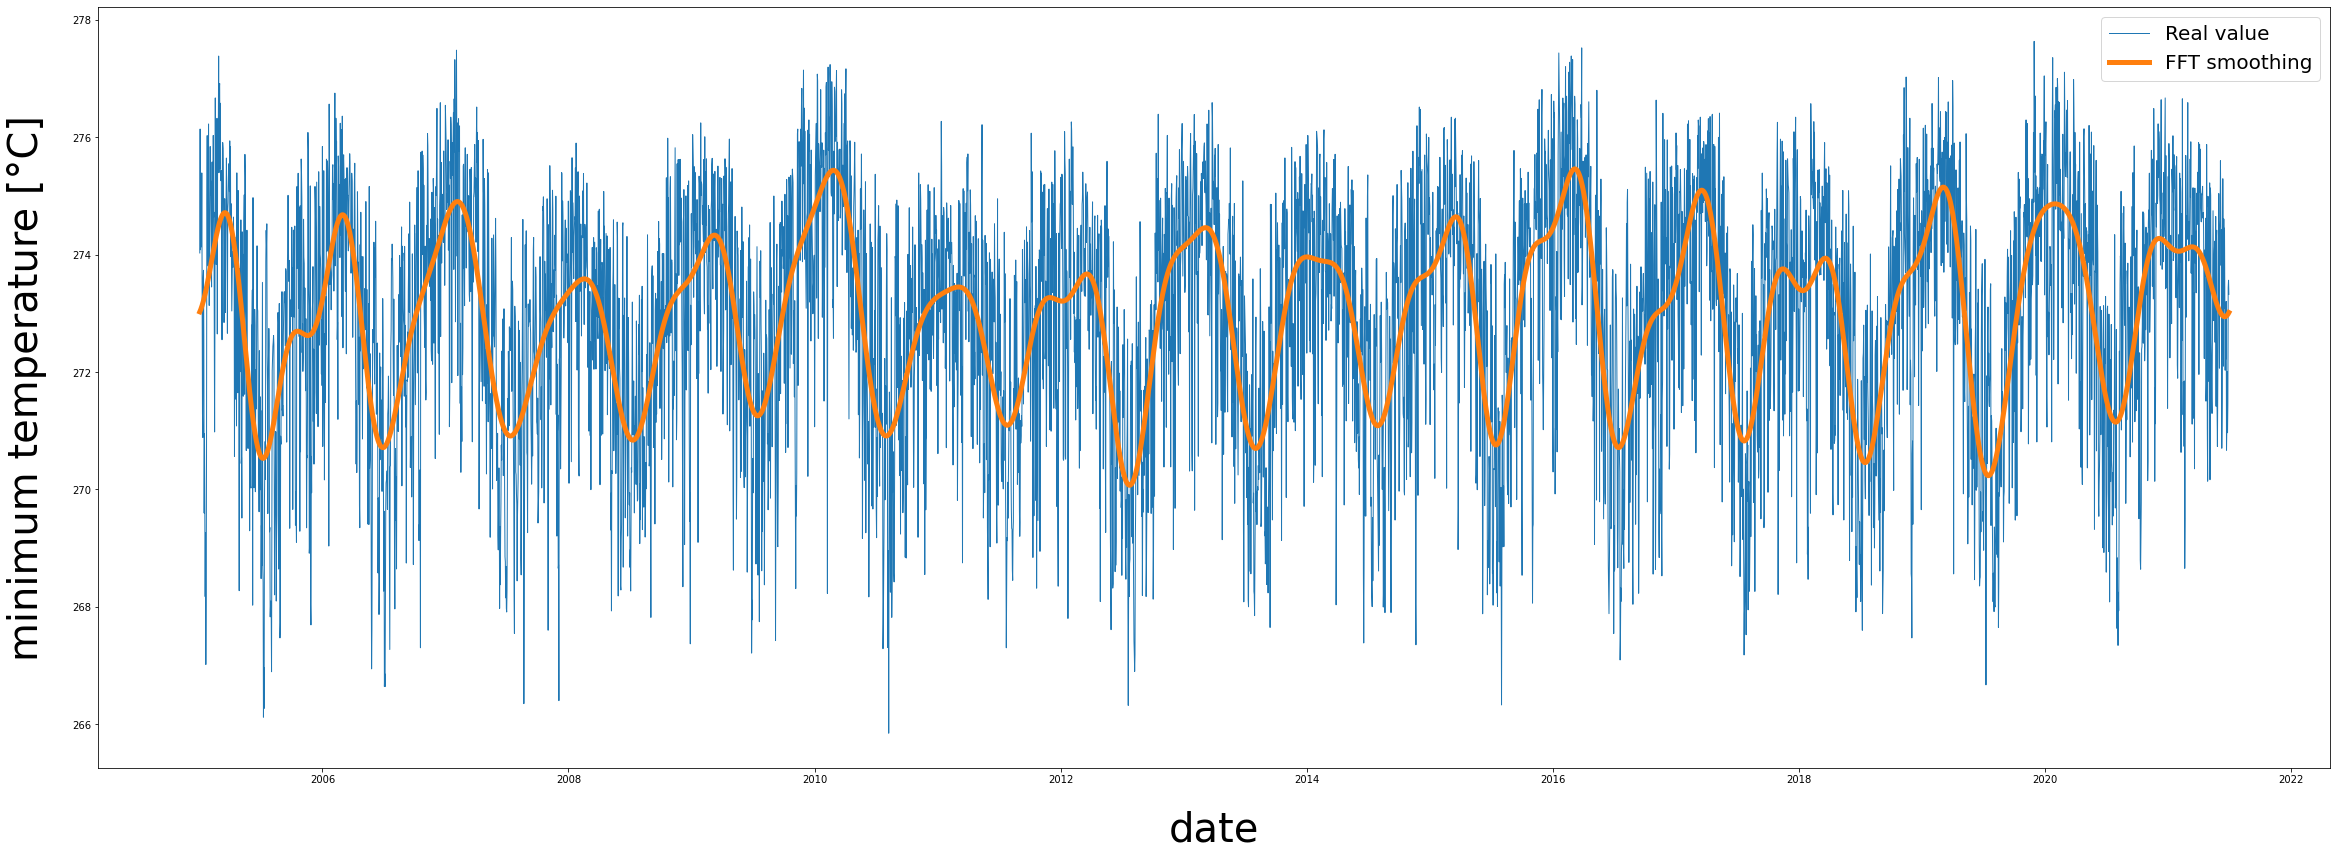

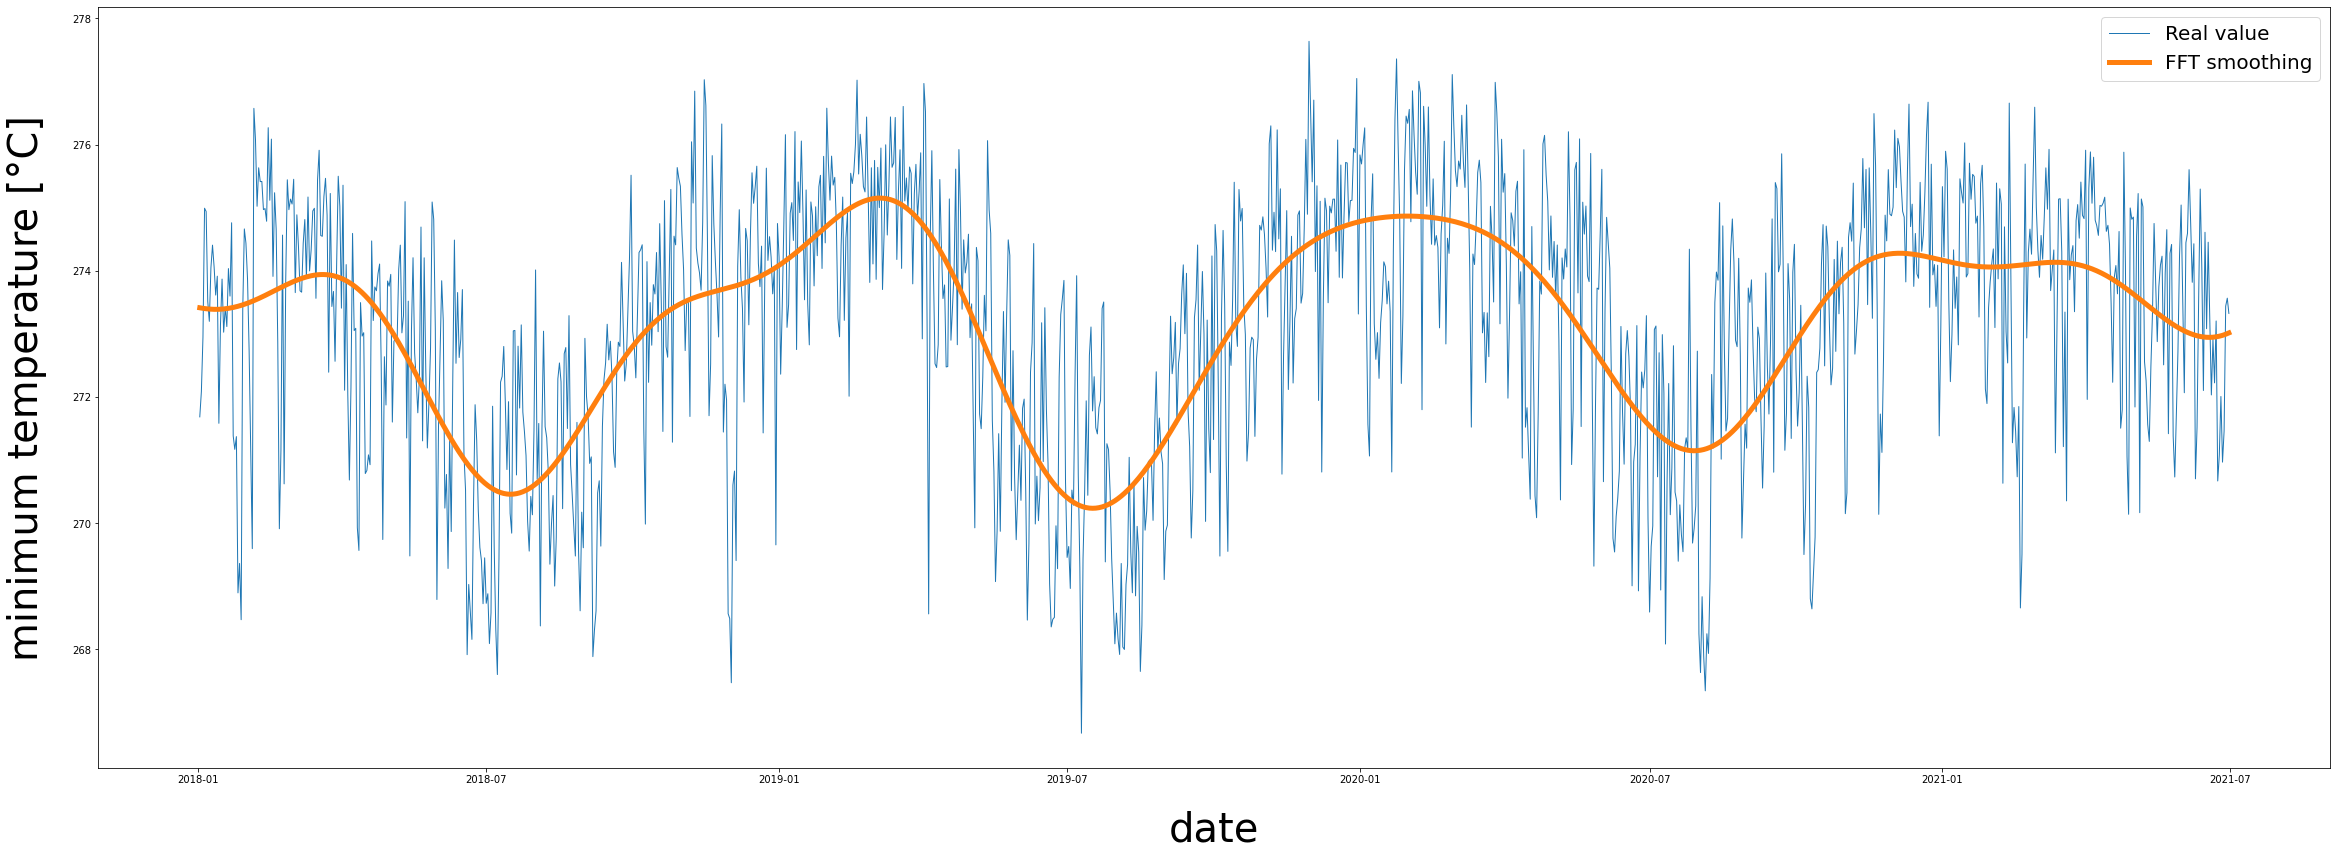

In [ ]:
fig = plt.figure(figsize=(40,14))
plt.xlabel('date',fontsize=40, labelpad=25)
plt.ylabel('minimum temperature [°C]',fontsize=40, labelpad=25)
plt.plot(data['temperature'], linewidth=1)
plt.plot(data['temperature_smoothed'], linewidth=5)
plt.legend(['Real value','FFT smoothing'], prop={'size': 20})
plt.title('',fontsize=40, pad=30)
                                                 
plt.show()

fig = plt.figure(figsize=(40,14))
plt.xlabel('date',fontsize=40, labelpad=25)
plt.ylabel('minimum temperature [°C]',fontsize=40, labelpad=25)
plt.plot(data.loc[data.index > '2018']['temperature'], linewidth=1)
plt.plot(data.loc[data.index > '2018']['temperature_smoothed'], linewidth=5)
plt.legend(['Real value','FFT smoothing'], prop={'size': 20})
plt.title('',fontsize=40, pad=30)
                                                 
plt.show()

# Prueba de estacionaridad

statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

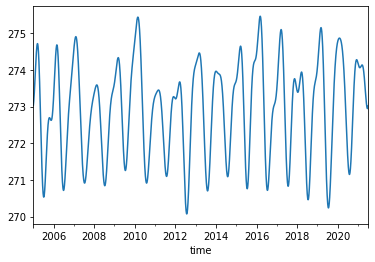

In [ ]:
# data['temperature'].plot()
data['temperature_smoothed'].plot()#.rolling(30).mean()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, windowroll = 15, cutoff = 0.05):
  #Determing rolling statistics
  rolmean = timeseries.rolling(windowroll).mean()
  rolstd = timeseries.rolling(windowroll).std()

  #Plot rolling statistics:
  fig,axes = plt.subplots(3,1,figsize=(12, 5))
  # fig = plt.figure(figsize=(12, 5))
  # orig = plt.plot(timeseries, color='blue',label='Original')
  axes[0].plot(timeseries, color='blue',label='Original')
  # mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  axes[1].plot(rolmean, color='red', label='Rolling Mean')
  # std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  axes[2].plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  # plt.title('Rolling Mean & Standard Deviation')
  plt.show()
  
  #Perform Dickey-Fuller test:
  # H_0 in adfuller is unit root exists (Non-Stationary)
  # We must observe significant p-value to convince ourselves tha the series is stationary
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  pvalue = dftest[1]
  if pvalue <= cutoff:
      print('p-value = '+ str(pvalue) + ' The series '+ timeseries.name + ' is likely stationary.')
      #return True
  else:
      print('p-value = '+ str(pvalue) + ' The series '+ timeseries.name + ' is likely non-stationary.')
      #return False
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  # Dubsin-Watson para verificar si hay o no autocorrelacion en el modelo valor critico: 1.85-2.15

If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure. [Fuente](https://www.analyticsvidhya.com/blog/2021/06/statistical-tests-to-check-stationarity-in-time-series-part-1/)

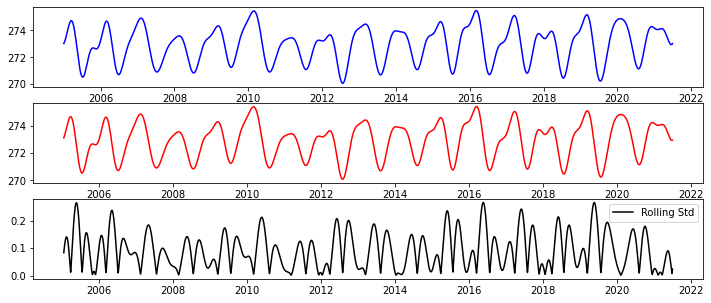

Results of Dickey-Fuller Test:
p-value = 0.0 The series temperature_smoothed is likely stationary.
Test Statistic                  -32.495953
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    6018.000000
Critical Value (1%)              -3.431437
Critical Value (5%)              -2.862020
Critical Value (10%)             -2.567026
dtype: float64


In [ ]:
# test_stationarity(data.temperature)
test_stationarity(data.temperature_smoothed)
# ambos parecen ser estacionarias

<====== Test statistic ======== |-2.86| =============================>

          ZONA DE RECHAZO     | tcritico |    ZONA DE NO RECHAZO

- Se rechaza la Ho que plantea que la serie no es estacionario con un 95% de confianza

[Tener en cuenta que el ventaneo solo se muestra como plot, mas no entra en el test.]

# Normalidad en los datos

[Fuente](https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html)

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
# N(0,1)
data_points = np.random.normal(loc = 0, scale = 1, size=1000) # datos aletorios para demostracion

(array([  4.,   6.,  33., 122., 196., 261., 217., 116.,  36.,   9.]),
 array([-3.75679668, -3.07941895, -2.40204123, -1.7246635 , -1.04728578,
        -0.36990806,  0.30746967,  0.98484739,  1.66222512,  2.33960284,
         3.01698056]),
 <a list of 10 Patch objects>)

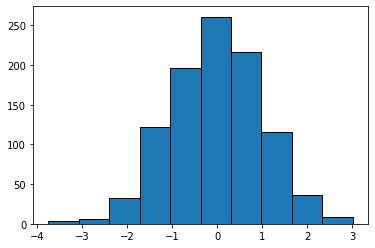

In [ ]:
plt.hist(data_points, edgecolor="black", lw=1)
# plt.show()

## Q-Q plot

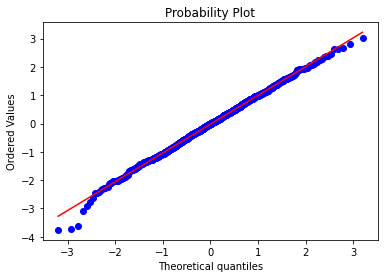

In [ ]:
stats.probplot(data_points, dist="norm", plot=pylab)
pylab.show()


## **Shapiro-Wilk Test**
Tests whether a data sample has a **Gaussian distribution.**

Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation *italicized text*

H0: the sample has a **Gaussian** distribution.  
H1: the sample does not have a Gaussian distribution.  

Si el p value es mayor a 0.5, la hipotesis nula no es rechazada y los valores si tienen una distrib. normal. [Fuente](https://www.investopedia.com/terms/p/p-value.asp)

Usualmente 
KS mas de 50 obs
SW menos de 50 obs, pero hay estudios que revelan que este ultimo sirve para ambos casos y presenta mejores resultados

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(data_points)
# print(stat,p)
if p<0.05:
  print('Ho se rechaza, la distrib. no es normal')
else:
  print("Ho no se rechaza, la distrib. es normal")

Ho no se rechaza, la distrib. es normal


# Otros ejemplitos

## ondas y fft

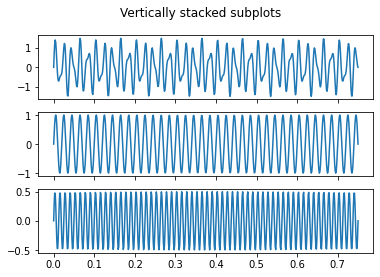

In [ ]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y1 = np.sin(50.0 * 2.0*np.pi*x)
y2 = 0.5*np.sin(80.0 * 2.0*np.pi*x)
y = y1 + y2

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, y1)
ax3.plot(x, y2)

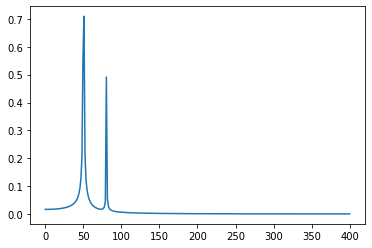

In [ ]:
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

## Example 9.7.1 
For the rainfall time series given in Example 9.6.1, calculate the autocorrelation at lags 0, 1, and 2. Calculate the 95%confidence limits for autocorrelation at lags 1and 2.


## Example 9.7.2 
The autocorrelation coefficients for a monthly streamflow time series at a gauging station at lags 0, 1, and 2 are 1.0, 0.79, and 0.52 respectively. Estimate the partial autocorrelation at these lags. Also, check whether the partial autocorrelation at lag 2 is significant or not at 5% significance level. Assume the data length to be 60.
